In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
# Fill null vlaues-train data
train_data['Gender'].fillna('Nil',inplace = True)
train_data['Married'].fillna('Nil',inplace = True)
train_data['Dependents'].fillna('Nil',inplace = True)
train_data['Self_Employed'].fillna('Nil',inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(),inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].median(),inplace = True)

In [9]:
# Fill null values-test data
test_data['Gender'].fillna('Nil',inplace = True)
test_data['Dependents'].fillna('Nil',inplace = True)
test_data['Self_Employed'].fillna('Nil',inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(),inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].median(),inplace = True)

In [10]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [12]:
numeric = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [13]:
#LabelEncoding
category_encode = category
le = preprocessing.LabelEncoder()
for i in category_encode:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.transform(test_data[i])
    
# Label encoding Loan_Status
label_encoder = preprocessing.LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [14]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
#droping Loan_id
train_data.drop('Loan_ID', axis=1, inplace=True)
Loan_ID = test_data['Loan_ID']
test_data.drop('Loan_ID', axis=1, inplace=True)

In [16]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,1,5849,0.0,128.0,360.0,1.0,2,1
1,1,2,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,1,2,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,1,2,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,0,1,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,0,1,5720,0,110.0,360.0,1.0,2
1,1,2,1,0,1,3076,1500,126.0,360.0,1.0,2
2,1,2,2,0,1,5000,1800,208.0,360.0,1.0,2
3,1,2,2,0,1,2340,2546,100.0,360.0,1.0,2
4,1,1,0,1,1,3276,0,78.0,360.0,1.0,2


In [33]:
X = train_data.drop("Loan_Status",axis=1)
Y = train_data["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [21]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:logistic',
}


In [22]:
params['eval_metric'] = "logloss"
num_boost_round = 999

In [23]:
dtrain = xgb.DMatrix(X, label=Y)
dtest = xgb.DMatrix(test_data)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [24]:
# tuning with max depth and min child weight
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(7,10)
    for min_child_weight in range(5,8)
]

In [25]:
min_logloss = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=100
    )
    # Update best MAE
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with max_depth=7, min_child_weight=5


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	LogLoss 0.48041080000000014 for 7 rounds
CV with max_depth=7, min_child_weight=6
	LogLoss 0.48398460000000004 for 10 rounds
CV with max_depth=7, min_child_weight=7
	LogLoss 0.4891362 for 7 rounds
CV with max_depth=8, min_child_weight=5
	LogLoss 0.4829646 for 7 rounds
CV with max_depth=8, min_child_weight=6
	LogLoss 0.4858873999999999 for 8 rounds
CV with max_depth=8, min_child_weight=7
	LogLoss 0.4879912 for 7 rounds
CV with max_depth=9, min_child_weight=5
	LogLoss 0.48672379999999993 for 8 rounds
CV with max_depth=9, min_child_weight=6
	LogLoss 0.4855676 for 8 rounds
CV with max_depth=9, min_child_weight=7
	LogLoss 0.48762740000000004 for 7 rounds
Best params: 7, 5, logloss: 0.48041080000000014


In [26]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [27]:
# tuning with subsample and colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [28]:
min_logloss = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=100
    )
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample,colsample)
print("Best params: {}, {}, Logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with subsample=1.0, colsample=1.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.48041080000000014 for 7 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.48696140000000004 for 9 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.4817488000000001 for 12 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.48485940000000005 for 17 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.48622259999999995 for 9 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.4925066 for 7 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.48990999999999996 for 13 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.4913742 for 7 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.4811287999999999 for 8 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.47774079999999997 for 7 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.48479599999999995 for 7 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.4800642 for 8 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.49150099999999997 for 9 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.48547419999999997 for 8 rounds
CV with subsampl

In [29]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [30]:
%time
# This can take some time…
min_logloss = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['logloss'],early_stopping_rounds=100)
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogloss {} for {} rounds\n".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = eta
        
print("Best params: {}, Logloss: {}".format(best_params, min_logloss))

Wall time: 0 ns
CV with eta=0.3
Wall time: 332 ms
	Logloss 0.47774079999999997 for 7 rounds

CV with eta=0.2


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Wall time: 333 ms
	Logloss 0.4804208 for 11 rounds

CV with eta=0.1
Wall time: 386 ms
	Logloss 0.480335 for 25 rounds

CV with eta=0.05
Wall time: 549 ms
	Logloss 0.4804672 for 72 rounds

CV with eta=0.01
Wall time: 1.33 s
	Logloss 0.4823886 for 321 rounds

CV with eta=0.005
Wall time: 2.39 s
	Logloss 0.48180100000000003 for 655 rounds

Best params: 0.3, Logloss: 0.47774079999999997


In [31]:
params['eta'] = best_params

In [32]:
params

{'max_depth': 7,
 'min_child_weight': 5,
 'eta': 0.3,
 'subsample': 0.8,
 'colsample_bytree': 0.9,
 'objective': 'reg:logistic',
 'eval_metric': 'logloss'}

In [34]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

[0]	Test-logloss:0.591382
Will train until Test-logloss hasn't improved in 100 rounds.
[1]	Test-logloss:0.532583
[2]	Test-logloss:0.52297
[3]	Test-logloss:0.483849
[4]	Test-logloss:0.464098
[5]	Test-logloss:0.454391
[6]	Test-logloss:0.447904
[7]	Test-logloss:0.447749
[8]	Test-logloss:0.44572
[9]	Test-logloss:0.446634
[10]	Test-logloss:0.44832
[11]	Test-logloss:0.449708
[12]	Test-logloss:0.447744
[13]	Test-logloss:0.448163
[14]	Test-logloss:0.448608
[15]	Test-logloss:0.454552
[16]	Test-logloss:0.459192
[17]	Test-logloss:0.464338
[18]	Test-logloss:0.472081
[19]	Test-logloss:0.465566
[20]	Test-logloss:0.469082
[21]	Test-logloss:0.469666
[22]	Test-logloss:0.472493
[23]	Test-logloss:0.470772
[24]	Test-logloss:0.469911
[25]	Test-logloss:0.473892
[26]	Test-logloss:0.477769
[27]	Test-logloss:0.477036
[28]	Test-logloss:0.467438
[29]	Test-logloss:0.464638
[30]	Test-logloss:0.467635
[31]	Test-logloss:0.468816
[32]	Test-logloss:0.46838
[33]	Test-logloss:0.467473
[34]	Test-logloss:0.469839
[35]	Tes

In [36]:
print("Best Logloss: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best Logloss: 0.45 with 9 rounds


In [37]:
boost_round = model.best_iteration+1

In [38]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round= boost_round
)

In [39]:
y_pred = model.predict(dtest)

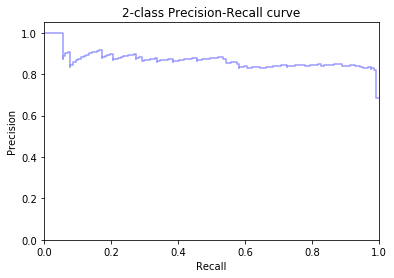

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.37663915753364563
Max F1-score at cut-off :  0.8992805755395684


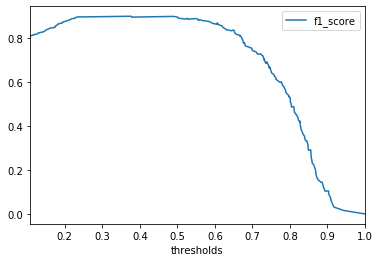

In [43]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [44]:
threshold_cutoff = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

In [45]:
dtrain = xgb.DMatrix(X, label=Y)
dtest = xgb.DMatrix(test_data)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [46]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round= boost_round
)

In [47]:
def xgb_pred(y, threshold= threshold_cutoff):
    y_bin = [1 if y_cont > threshold else 0 for y_cont in y] # binarizing your output
    return y_bin

In [48]:
pred = model.predict(dtest)
pred_new  = xgb_pred(pred)

In [49]:
def mapp(x):
      if x == 1:
        return 'Y'
      else:
        return 'N'
mapped_pred = np.arange(len(pred_new)).astype('str')
i = 0
while (i < len(pred_new)):
    mapped_pred[i] = mapp(pred_new[i])
    i = i+1

In [50]:
d = {'Loan_ID': Loan_ID , 'Loan_Status': mapped_pred}
upload_XGB = pd.DataFrame(d)
upload_XGB.to_csv("upload_XGB.csv",index=False)